In [129]:
# for loading/processing the images  
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

from sklearn.metrics import accuracy_score,confusion_matrix # metrics error
from sklearn.model_selection import train_test_split # resampling method
# models 

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import pandas as pd
import pickle
import matplotlib.pyplot as plt

import pandas as pd

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

import splitfolders
input_shape=(200,200)

In [130]:
# Dataset folders 
print(os.chdir('/Users/franciscosanchez/Downloads/'))
dataset_dir = 'dataset2'
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

None


In [131]:
labels = ["N",   #0
          "P",   #1
          "T",   #2
         ]



In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
seed=42
# Create an instance of ImageDataGenerator for training, validation, and test sets
train_data_gen = ImageDataGenerator(rescale = 1/255.)
valid_data_gen = ImageDataGenerator(rescale = 1/255.)
test_data_gen = ImageDataGenerator(rescale = 1/255.)

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
train_gen = train_data_gen.flow_from_directory(directory=training_dir,
                                               target_size=input_shape,
                                               color_mode='grayscale',
                                                classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=True,
                                               seed=seed)
valid_gen = train_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=input_shape,
                                               color_mode='grayscale',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=False,
                                               seed=seed)
test_gen = train_data_gen.flow_from_directory(directory=test_dir,
                                              target_size=input_shape,
                                              color_mode='grayscale',
                                              classes=None, # can be set to labels
                                              class_mode='categorical',
                                              batch_size=8,
                                              shuffle=False,
                                              seed=seed)




Found 11601 images belonging to 3 classes.
Found 2319 images belonging to 3 classes.
Found 1550 images belonging to 3 classes.


In [133]:
act = np.zeros(((200,200,1)+(8*len(test_gen),)),dtype="uint8")

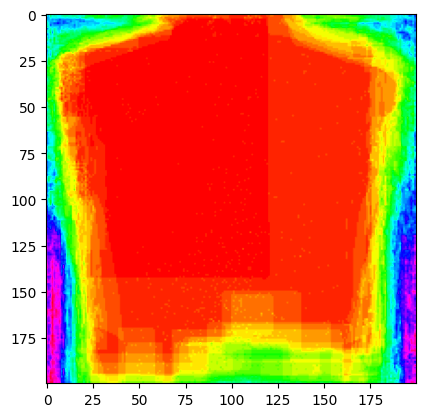

In [134]:
act = np.zeros(((200,200,1)+(8*len(test_gen),)),dtype="uint8")

for l in range(len(test_gen)):
    img, label = test_gen.next()
    for j in range(len(img)):
        
        act[:,:,:,l*j+l] = img[j,:,:,:]

vact_test_gentP = np.var(act,3) 
plt.imshow(vact_test_gentP,cmap=plt.get_cmap("hsv"))

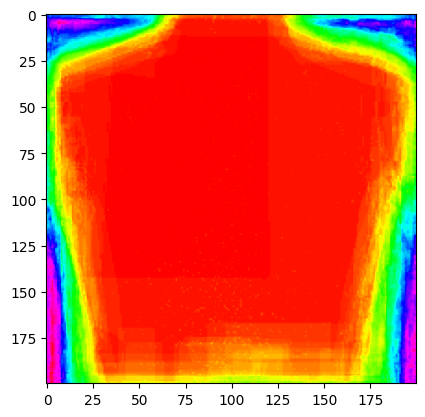

In [135]:

act = np.zeros(((200,200,1)+(8*len(valid_gen),)),dtype="uint8")
for l in range(len(valid_gen)):
    img, label = test_gen.next()
    for j in range(len(img)):
        
        act[:,:,:,l*j+l] = img[j,:,:,:]


vact_valid_gentP = np.var(act,3) 
plt.imshow(vact_valid_gentP,cmap=plt.get_cmap("hsv"))

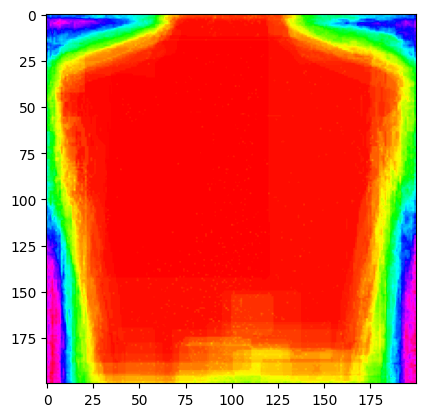

In [136]:
act = np.zeros(((200,200,1)+(8*len(train_gen),)),dtype="uint8")
for l in range(len(train_gen)):
    img, label = test_gen.next()
    for j in range(len(img)):
        
        act[:,:,:,l*j+l] = img[j,:,:,:]


vact_train_gentP = np.var(act,3) 
plt.imshow(vact_train_gentP,cmap=plt.get_cmap("hsv"))

In [137]:
# Dataset folders 
print(os.chdir('/Users/franciscosanchez'))
dataset_dir = 'dataset'
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

None


In [138]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
seed=42
# Create an instance of ImageDataGenerator for training, validation, and test sets
train_data_gen = ImageDataGenerator(rescale = 1/255.)
valid_data_gen = ImageDataGenerator(rescale = 1/255.)
test_data_gen = ImageDataGenerator(rescale = 1/255.)

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
train_gen = train_data_gen.flow_from_directory(directory=training_dir,
                                               target_size=input_shape,
                                               color_mode='grayscale',
                                                classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=True,
                                               seed=seed)
valid_gen = train_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=input_shape,
                                               color_mode='grayscale',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=False,
                                               seed=seed)
test_gen = train_data_gen.flow_from_directory(directory=test_dir,
                                              target_size=input_shape,
                                              color_mode='grayscale',
                                              classes=None, # can be set to labels
                                              class_mode='categorical',
                                              batch_size=8,
                                              shuffle=False,
                                              seed=seed)




Found 11601 images belonging to 3 classes.
Found 2319 images belonging to 3 classes.
Found 1550 images belonging to 3 classes.


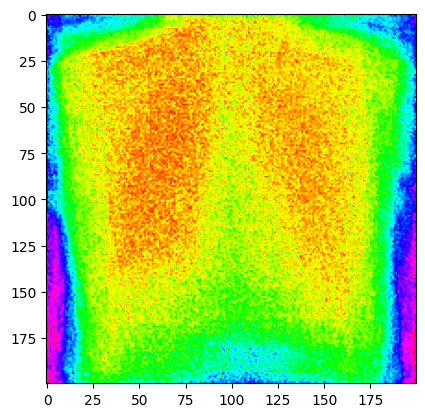

In [139]:
act = np.zeros(((200,200,1)+(8*len(test_gen),)),dtype="uint8")

for l in range(len(test_gen)):
    img, label = test_gen.next()
    for j in range(len(img)):
        
        act[:,:,:,l*j+l] = img[j,:,:,:]

vact_test_gent = np.var(act,3) 
plt.imshow(vact_test_gent,cmap=plt.get_cmap("hsv"))

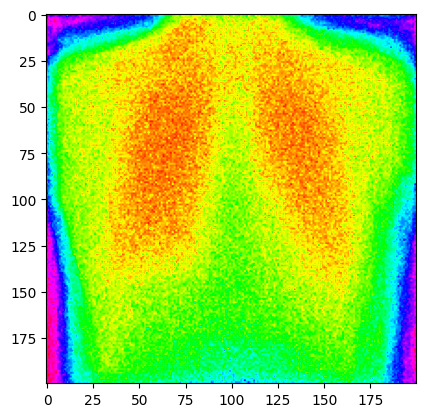

In [140]:

act = np.zeros(((200,200,1)+(8*len(valid_gen),)),dtype="uint8")
for l in range(len(valid_gen)):
    img, label = test_gen.next()
    for j in range(len(img)):
        
        act[:,:,:,l*j+l] = img[j,:,:,:]


vact_valid_gent = np.var(act,3) 
plt.imshow(vact_valid_gent,cmap=plt.get_cmap("hsv"))


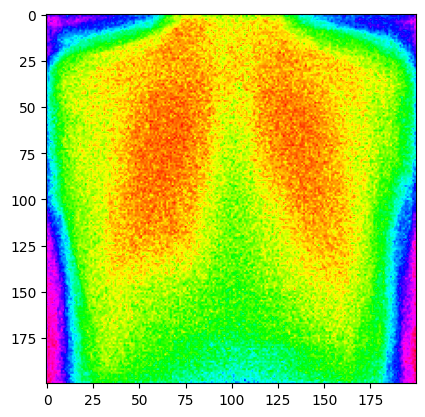

In [141]:
act = np.zeros(((200,200,1)+(8*len(train_gen),)),dtype="uint8")
for l in range(len(train_gen)):
    img, label = test_gen.next()
    for j in range(len(img)):
        
        act[:,:,:,l*j+l] = img[j,:,:,:]


vact_train_gent= np.var(act,3) 
plt.imshow(vact_train_gent,cmap=plt.get_cmap("hsv"))

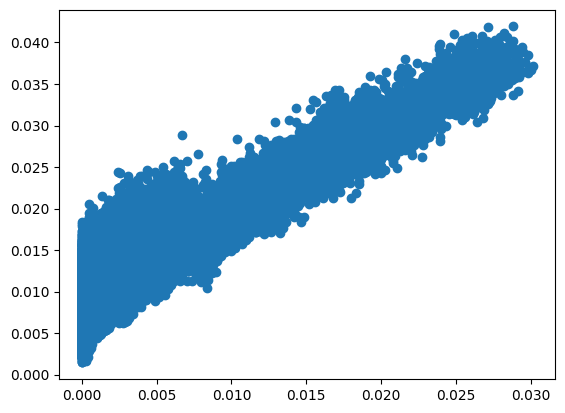

In [142]:
plt.scatter(vact_train_gentP.flat,vact_train_gent.flat)

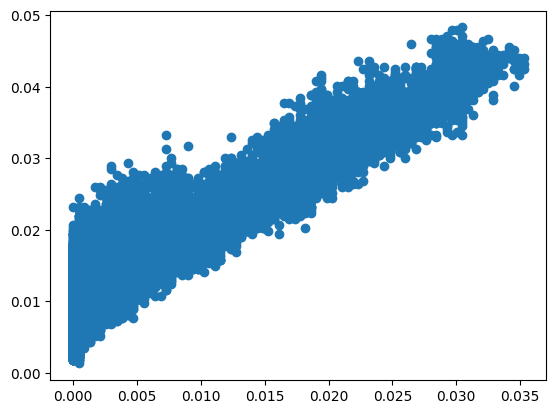

In [143]:
plt.scatter(vact_valid_gentP.flat,vact_valid_gent.flat)

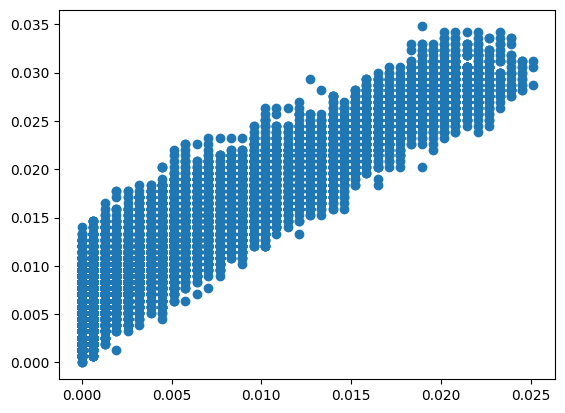

In [144]:

plt.scatter(vact_test_gentP.flat,vact_test_gent.flat)

Text(0.5, 0.98, 'Scatter Plot: Non Processed Vs Processed')

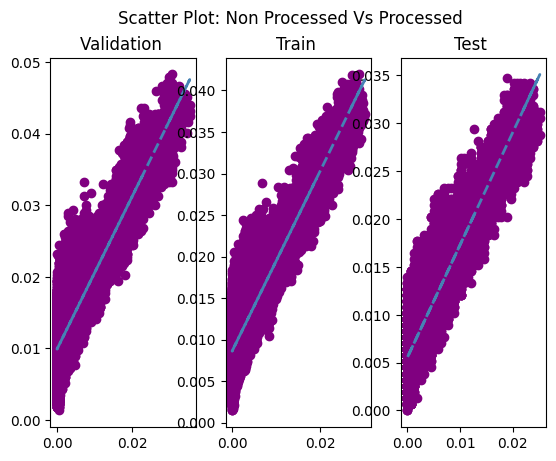

In [175]:
fig,axes = plt.subplots(1, 3)

ax=axes[0]
#find line of best fit
a, b = np.polyfit(vact_valid_gentP.flat,vact_valid_gent.flat, 1)

#add points to plot
ax.scatter(vact_valid_gentP.flat,vact_valid_gent.flat, color='purple')
#add line of best fit to plot
ax.plot(vact_valid_gentP.flat, a*vact_valid_gentP.flat+b, color='steelblue', linestyle='--', linewidth=2)
ax.title.set_text('Validation ')

ax=axes[1]
#find line of best fit
a, b = np.polyfit(vact_train_gentP.flat,vact_train_gent.flat, 1)

#add points to plot
ax.scatter(vact_train_gentP.flat,vact_train_gent.flat, color='purple')
#add line of best fit to plot
ax.plot(vact_train_gentP.flat, a*vact_train_gentP.flat+b, color='steelblue', linestyle='--', linewidth=2)
ax.title.set_text('Train ')

ax=axes[2]
#find line of best fit
a, b = np.polyfit(vact_test_gentP.flat,vact_test_gent.flat, 1)

#add points to plot
ax.scatter(vact_test_gentP.flat,vact_test_gent.flat, color='purple')
#add line of best fit to plot
ax.plot(vact_test_gentP.flat, a*vact_test_gentP.flat+b, color='steelblue', linestyle='--', linewidth=2)
ax.title.set_text('Test ')

plt.suptitle('Scatter Plot: Non Processed Vs Processed')



Text(1, 17, 'y = 0.01 + 1.07x')

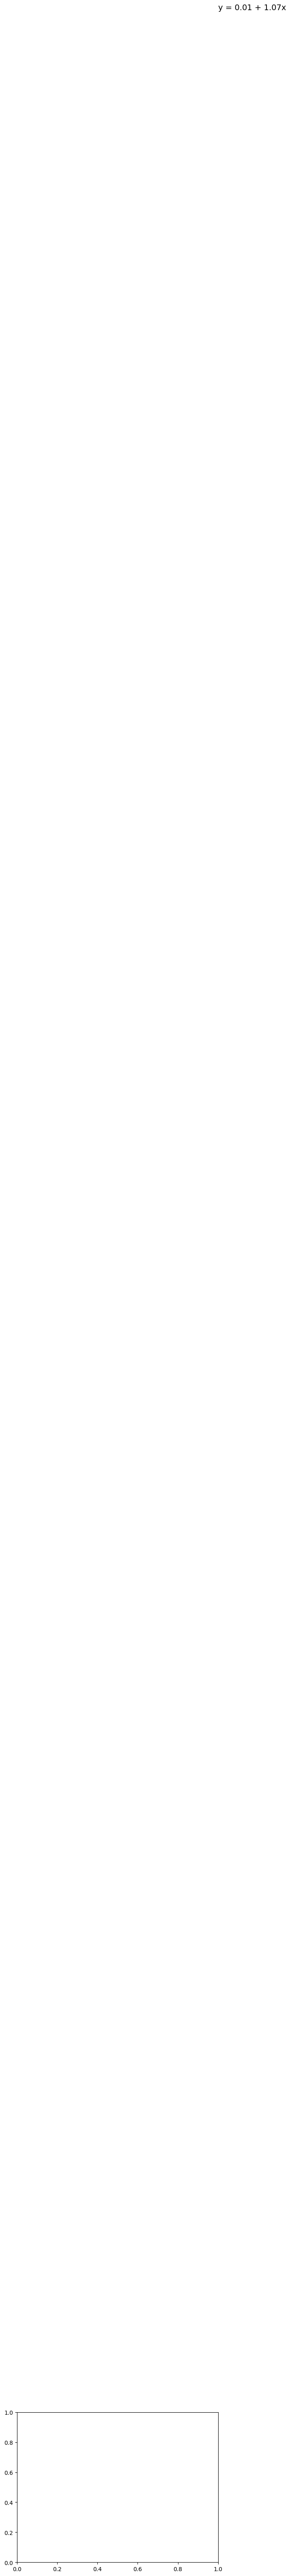

In [146]:
#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)


(array([25806.,  4739.,  3129.,  1769.,  1436.,  1141.,   665.,   645.,
          544.,   126.]),
 array([0.        , 0.00251089, 0.00502179, 0.00753268, 0.01004358,
        0.01255447, 0.01506536, 0.01757626, 0.02008715, 0.02259804,
        0.02510894]),
 <BarContainer object of 10 artists>)

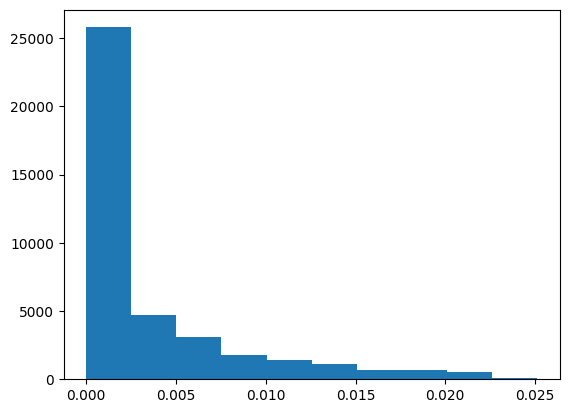

In [147]:
plt.hist(vact_test_gentP.flat)

(array([ 4210., 13439., 10169.,  4166.,  3112.,  2110.,  1109.,   983.,
          624.,    78.]),
 array([0.        , 0.00347805, 0.00695611, 0.01043416, 0.01391221,
        0.01739026, 0.02086832, 0.02434637, 0.02782442, 0.03130248,
        0.03478053]),
 <BarContainer object of 10 artists>)

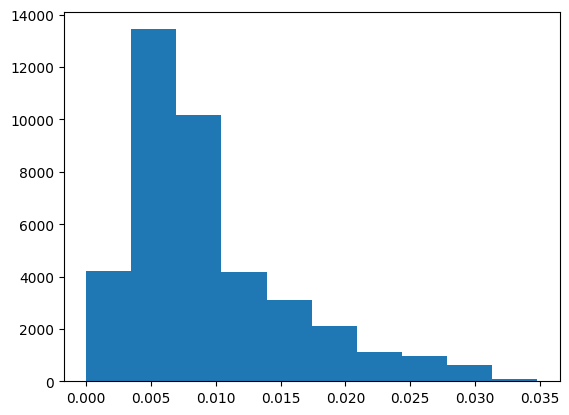

In [148]:
plt.hist(vact_test_gent.flat)

Text(0.5, 0.98, 'Variance Heatmaps: Test, Valid, Train')

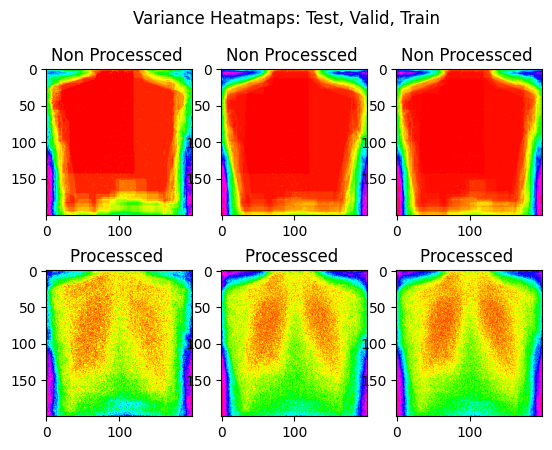

In [173]:
fig,axes = plt.subplots(2, 3)



ax= axes[0,0]
ax.title.set_text('Non Processced ')
ax.imshow(vact_test_gentP,cmap=plt.get_cmap("hsv"))

ax= axes[1,0]
ax.title.set_text('Processced ')
ax.imshow(vact_test_gent,cmap=plt.get_cmap("hsv"))

ax= axes[0,1]
ax.title.set_text('Non Processced ')
ax.imshow(vact_valid_gentP,cmap=plt.get_cmap("hsv"))

ax= axes[1,1]
ax.title.set_text('Processced ')
ax.imshow(vact_valid_gent,cmap=plt.get_cmap("hsv"))


ax= axes[0,2]
ax.title.set_text('Non Processced ')
ax.imshow(vact_train_gentP,cmap=plt.get_cmap("hsv"))

ax= axes[1,2]
ax.title.set_text('Processced ')
ax.imshow(vact_train_gent,cmap=plt.get_cmap("hsv"))
plt.suptitle('Variance Heatmaps: Test, Valid, Train')

In [114]:
'training_data_final/{}/{}'.format('hola', 'hola')

'training_data_final/hola/hola'

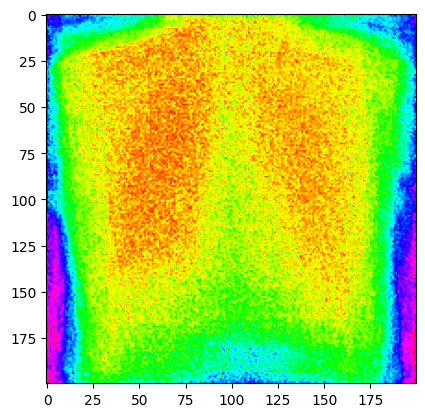

In [121]:
plt.imshow(vact_test_gent,cmap=plt.get_cmap("hsv"))

In [149]:
np.corrcoef(vact_valid_gentP.flat,vact_valid_gent.flat)

array([[1.        , 0.90702422],
       [0.90702422, 1.        ]])

In [150]:
np.corrcoef(vact_test_gentP.flat,vact_test_gent.flat)

array([[1.        , 0.92958677],
       [0.92958677, 1.        ]])

In [151]:
np.corrcoef(vact_train_gentP.flat,vact_train_gent.flat)

array([[1.        , 0.91453991],
       [0.91453991, 1.        ]])

In [153]:
ax = axes[2, 3]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [157]:
ax=axes[1, 1]

In [158]:
print(ax)

AxesSubplot(0.398529,0.11;0.227941x0.35)
